<center>
    <h1>
            Introduction to Python
    </h1></center><p><p>

<h3>Lesson five: More Data Visualizations</h3>

29/04/2019

fabio.grassi@aalto.fi

Shorter lesson, as quite a few people are missing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To practice some advanced data visualization, we are going to use the famous iris data set, which contains information on different types of iris flowers.


![Petalsepal](https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

As we can see, the data is not very pretty in this format. Luckily, we now know how to use Pandas to make it easier to work with.

## Exercise:

Convert the data to a Pandas DataFrame.

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


Now that we have the data in DataFrame format, we can more easily work with it.

Let us now visualize the data:

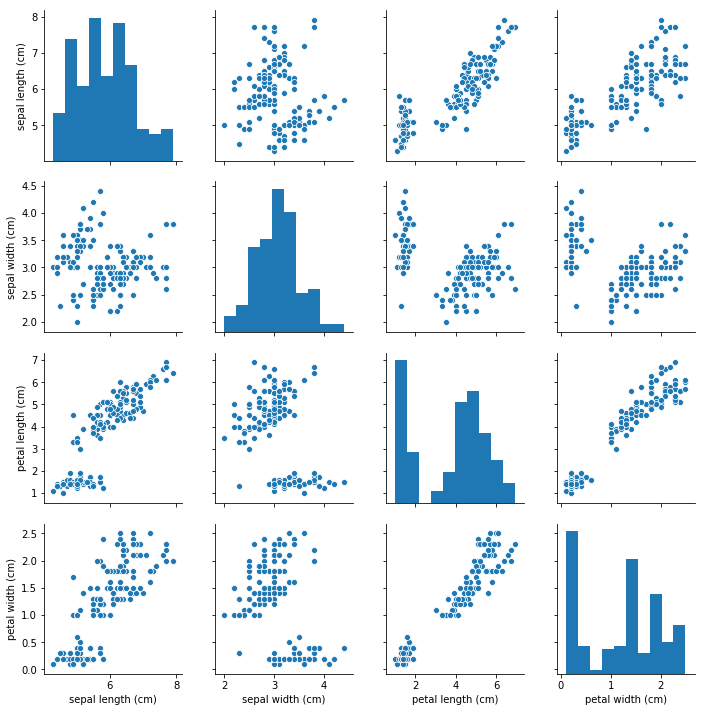

In [5]:
sns.pairplot(df)

The scatter plots appear to be telling us that there is something going on in our data: for example, petal length seems to correlate nicely with petal width. But let us see if we can squeeze more information in a single plot.

We begin by visualizing our data points in a single scatter plot using petal length and width for x and y values.

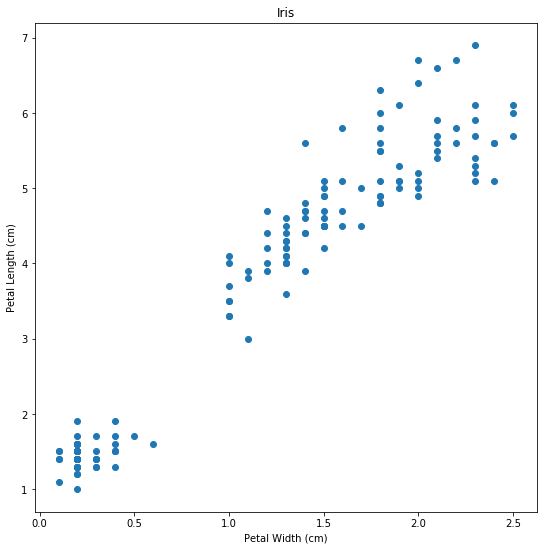

In [6]:
plt.figure(figsize=(9,9))
plt.title("Iris")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.scatter(df["petal width (cm)"], # x axis
            df["petal length (cm)"], # y axis
           )
plt.show()

This is our standard scatter plot. It is used to visualize data points and how two variables relate to each other. One way we can do more with it is by using colors:

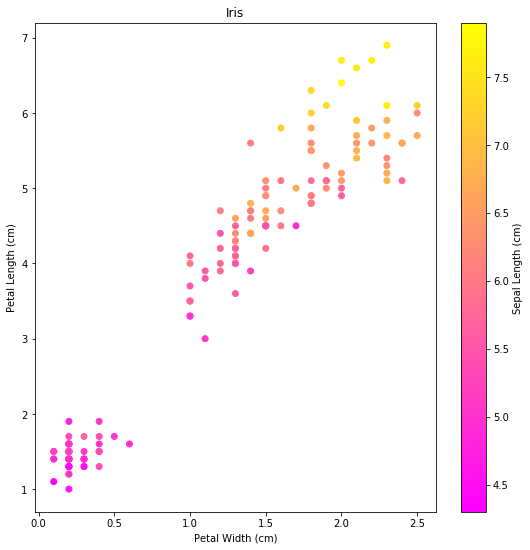

In [7]:
plt.figure(figsize=(9,9))
plt.title("Iris")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.scatter(df["petal width (cm)"], # x axis
            df["petal length (cm)"], # y axis
            c = df["sepal length (cm)"], # Color
            cmap = "spring") # Colormap (optional)
plt.colorbar().set_label("Sepal Length (cm)")
plt.show()

Technically, it is still possible to add more information to our plot. Whether or not it is a good idea to do so depends on the data itself. Let us now try to add a fourth dimension to our plot by using dot size.

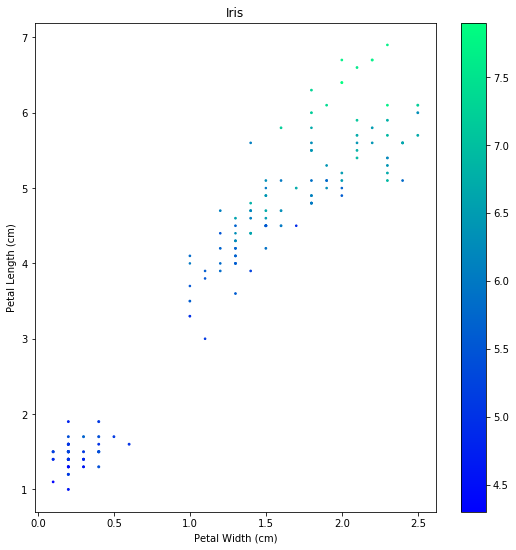

In [8]:
plt.figure(figsize=(9,9))
plt.title("Iris")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.scatter(df["petal width (cm)"], # x axis
            df["petal length (cm)"], # y axis
            c = df["sepal length (cm)"], # Color
            s = df["sepal width (cm)"], # Size
            cmap = "winter") # Colormap
plt.colorbar()
plt.show()

It seems that using the values of sepal width as point size did not add any instantly visible information to our plot. This is likely because the values are distributed in a relatively narrow range. We can try to make these differences more visible by multiplying the values of sepal width:

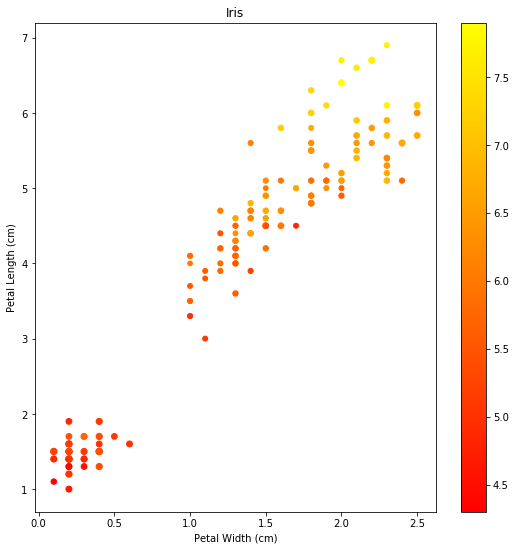

In [9]:
plt.figure(figsize=(9,9))
plt.title("Iris")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.scatter(df["petal width (cm)"], # x axis
            df["petal length (cm)"], # y axis
            c = df["sepal length (cm)"], # Color
            s = df["sepal width (cm)"]*10, # Size - notice that we multiplied by 10 to increase differences.
            cmap = "autumn")
plt.colorbar()
plt.show()

Slightly better, but let us try one last attempt to make the sepal width differences stand out even more: instead of increasing the differences linearly (i.e. by multiplying by 10), we are going to exponentiate:

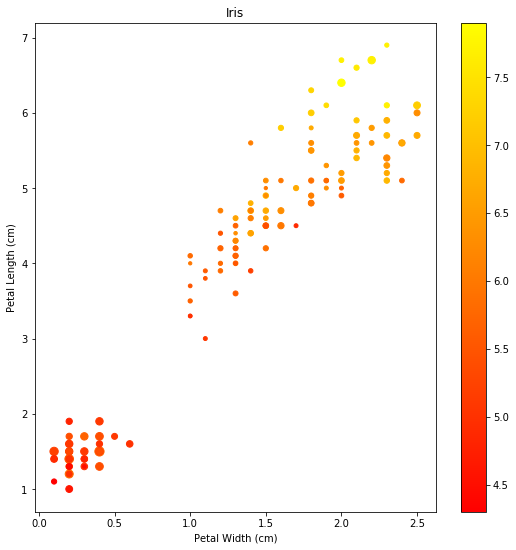

In [10]:
plt.figure(figsize=(9,9))
plt.title("Iris")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.scatter(df["petal width (cm)"], # x axis
            df["petal length (cm)"], # y axis
            c = df["sepal length (cm)"], # Color
            s = df["sepal width (cm)"]**3, # Size - this time we take the cubed value of sepal width.
            cmap = "autumn")
plt.colorbar()
plt.show()

Now the differences in sepal width are clearly visible: we can see that data points in the bottom left and in the top right tend to have larger sepal width values compared to the ones in the middle. This can be a useful visualization technique, however, one must be careful when presenting results as what we are showing now is not *sepal width*, but *(sepal width)³*.

## Optional Exercise:

Explore the popular [Boston dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) below using the following tools:

* sns.pairplot() (This one can take a list of Series, or a DataFrame, as argument, e.g. sns.pairplot(df))
* sns.distplot() (Single feature, e.g. sns.distplot(df["Sepal Width (cm)"])
* sns.boxplot() (Single feature)
* plt.scatter() (see above)
* plt.dogplot() (no arguments needed, just run it like that)
* plt.hist() (takes one argument, e.g. df["Sepal Width (cm)"])

In [11]:
import seaborn as sns
from sklearn.datasets import load_boston
b = load_boston()
bdf = pd.DataFrame(b.data, columns = b.feature_names)
bdf["target"] = b.target